**Redes neurais convolucionais**

Busca extrair as caracteristicas da imagem e então classificá-la.

Usado para a visão computacional, processamento de imagens. 

SVM é um dos melhores algoritmos de machine learning. CNN muito usadas para imagens.

Uma imagem colorida possui 3 canais.

Extração de caracteristicas: Retirar caracteristicas de cada tipo de imagem.

Extração de caracteristicas > rede neural.

Leitura da imagem pixel a pixel.

cada pixel da imagem vai para um neurônio da rede.

Funcionamento das redes neurais

Problemas da extração de caracteristicas: Qual caracteristica usar? Grande quantidade de pixels. 

Rede neural densa: Um neurônio é conectado a outro na rede.

Uma rede neural convolucional não utiliza todas as entradas (pixels). Ela seleciona automaticamente as caracteristicas mais importantes. Usa as caracteristicas mais importantes como entrada. Os neurônios de entrada são menos. A rede neural descobre a caracteristica mais importante da imagem.

Etapas: 
1 - Operador de convolução ->  Convolução: Adiciona cada elemento da imagem para seus vizinhos. Imagem * kernel (matriz). Imagem > aplicação de kernels na imagem. Quanto maior os valores, melhores as caracteristicas. Diminui a dimensionalidade e melhora o processamento. O mapa de caracteristicas detecta as partes principais da caracteristicas. "A função relu retira as partes mais escuras da imagem". Camada de convolução -> aplicação dos mapas de caracteristicas. **Determinar os melhores pesos e as melhores caracteristicas. Ajustar os pesos e encontrar o melhor detector de caracteristicas.**

Relu: Retira os valores negativas

2 - Pooling -> Realça as caracteristicas, evitando informações desnecessárias. Maxpooling > pega o maior valor. Além disso, existe o pooling médio, mínimo, mas uma rede busca-se maximizar as caracteristicas. Reduzir as caracteristicas para reduzir ainda mais os dados. Ajuda a diminuir o overfiting e o ruído.


3 - Flattening -> Mapa de caracteristicas no formato de matriz e transforma em um vetor para aplicar na rede neural.

4 - Rede neural densa: Rede neural para a classificação

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential # Uma rede neural é uma sequência de camadas
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator # O tensorflow já realiza a extração dos pixels.

Carregando as imagens

Ao trabalhar com o tensorflow consegue o nome da classe a partir do nome das pastas

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Mestrado/Cursos - Udemy/Visão computacional/Recursos/Visão Computacional Guia Completo/Datasets/homer_bart_2.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

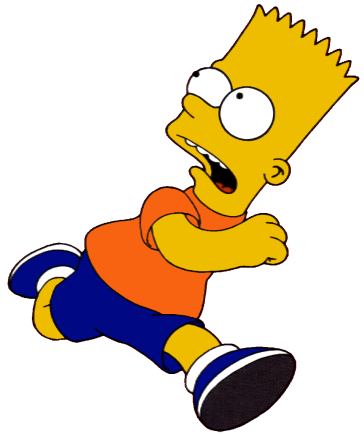

In [5]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/bart/bart100.bmp')

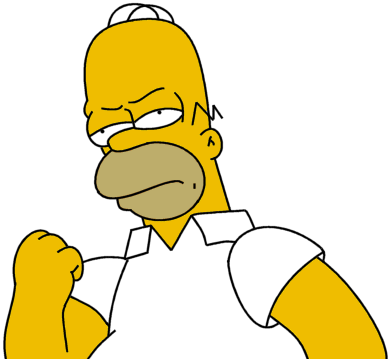

In [6]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/homer/homer107.bmp')

**Separação em treino e teste**

In [8]:
gerador_treinamento = ImageDataGenerator(rescale = 1/.255, rotation_range = 7, horizontal_flip=True, zoom_range=0.2)
# ImageDataGenerator -> gera novas imagens a partir do conjunto de dados
# rescale -> normalização a imagem
# horizontal_flip -> indica que será aplicada rotação horizontal
# zoom_range -> zoom na imagem
# rotation_range -> indica que será realizadas rotações nos dados

In [9]:
dataset_treinamento = gerador_treinamento.flow_from_directory('/content/homer_bart_2/training_set',
                                                              target_size = (64,64), # Dimensões das imagens
                                                              batch_size = 8, # Cria batchs que contém n imagens, essas imagens são mandadas, atualizados os pesos e depois manda mais imagens 
                                                              class_mode = 'categorical',
                                                              shuffle = True # Mistura as imagens antes de enviar para a rede
                                                              ) 
# Buscar as imagens do diretorio

Found 215 images belonging to 2 classes.


In [10]:
gerador_treino = ImageDataGenerator(1./255)

In [11]:
dataset_teste =  gerador_treino.flow_from_directory('/content/homer_bart_2/test_set', target_size = (64,64), batch_size = 1, class_mode = 'categorical', shuffle = False)

Found 54 images belonging to 2 classes.


**Construção e treino da rede**

In [125]:
rede = Sequential()
# 1ª camada de convolução
rede.add(Conv2D(filters = 32, # Detector de caracteristicas
                kernel_size = (3,3), # Tamanho do detector de caracteristicas
                activation = 'relu', # Função de ativação
                input_shape = (64,64,3) # Dimensão da imagem e qtd de canais de cor. Utilizado na primeira camada
                ))
# Camada de pooling
rede.add(MaxPool2D(pool_size=(2,2)))
# 2ª Camada de convolução
rede.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
# Camada de pooling
rede.add(MaxPool2D(pool_size=(2,2)))
# 3ª Camada de convolução
rede.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
# Camada de pooling
rede.add(MaxPool2D(pool_size=(2,2)))
# Camada flatten > converte para vetor e cada posição é dada como entrada para a rede neural densa
rede.add(Flatten())
# 1ª camada densa
rede.add(Dense(units = 577, # (6 * 6 * 32 + 2) / 7
               activation = 'relu'))
# 2ª camada densa
rede.add(Dense(units = 577,  activation = 'relu'))
# 3ª camada densa
rede.add(Dense(units = 2,  activation = 'softmax')) # Ao usar o parâmetro class_mode = 'categorical' é necessário dois neurônios na camada de saída

Função

sigmoid -> Retorna a probabilidade para cada um dos neurônios

softmax -> Retorna a probabilidade para todos os neurônios


In [126]:
rede.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 6, 6, 32)        

In [129]:
rede.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [130]:
historico = rede.fit(dataset_treinamento, epochs = 50)

Epoch 1/50
27/27 [==============================] - 2s 26ms/step - loss: 0.9795 - accuracy: 0.7767
Epoch 2/50
27/27 [==============================] - 1s 23ms/step - loss: 0.4789 - accuracy: 0.7907
Epoch 3/50
27/27 [==============================] - 1s 23ms/step - loss: 0.6167 - accuracy: 0.7721
Epoch 4/50
27/27 [==============================] - 1s 23ms/step - loss: 0.5506 - accuracy: 0.7581
Epoch 5/50
27/27 [==============================] - 1s 24ms/step - loss: 0.5217 - accuracy: 0.7674
Epoch 6/50
27/27 [==============================] - 1s 24ms/step - loss: 0.4640 - accuracy: 0.8000
Epoch 7/50
27/27 [==============================] - 1s 24ms/step - loss: 0.4741 - accuracy: 0.7442
Epoch 8/50
27/27 [==============================] - 1s 24ms/step - loss: 0.4614 - accuracy: 0.8000
Epoch 9/50
27/27 [==============================] - 1s 23ms/step - loss: 0.6270 - accuracy: 0.7442
Epoch 10/50
27/27 [==============================] - 1s 24ms/step - loss: 0.4041 - accuracy: 0.8233
Epoch 11/

**Avaliação da rede**

In [131]:
previsoes = rede.predict(dataset_teste)
previsoes

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


array([[0.57902735, 0.42097265],
       [0.7139493 , 0.2860507 ],
       [0.99035466, 0.0096453 ],
       [0.9940606 , 0.00593945],
       [0.9625815 , 0.03741848],
       [0.4845799 , 0.5154201 ],
       [0.9644152 , 0.03558477],
       [0.35685864, 0.6431413 ],
       [0.68695605, 0.31304395],
       [0.23312822, 0.7668718 ],
       [0.32560655, 0.6743935 ],
       [0.6851464 , 0.31485358],
       [0.24624828, 0.7537517 ],
       [0.9795233 , 0.02047672],
       [0.24624828, 0.7537517 ],
       [0.99813974, 0.00186025],
       [0.86470544, 0.13529457],
       [0.77784616, 0.22215386],
       [0.9370732 , 0.06292677],
       [0.8644517 , 0.13554831],
       [0.5775947 , 0.42240524],
       [0.7893734 , 0.21062662],
       [0.775772  , 0.22422801],
       [0.24624828, 0.7537517 ],
       [0.5654619 , 0.43453807],
       [0.64173156, 0.3582684 ],
       [0.9903295 , 0.00967044],
       [0.9973833 , 0.00261669],
       [0.43010435, 0.5698956 ],
       [0.24624828, 0.7537517 ],
       [0.

In [132]:
previsoes = np.argmax(previsoes, axis = 1)
previsoes

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [133]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset_teste.classes, previsoes)

0.8703703703703703

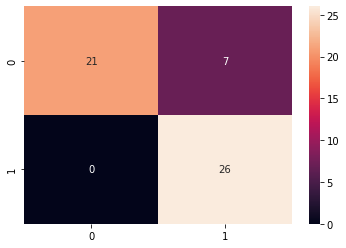

In [134]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset_teste.classes, previsoes)
sns.heatmap(cm, annot = True)

In [135]:
from sklearn.metrics import classification_report
print(classification_report(dataset_teste.classes, previsoes))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        28
           1       0.79      1.00      0.88        26

    accuracy                           0.87        54
   macro avg       0.89      0.88      0.87        54
weighted avg       0.90      0.87      0.87        54



**Classificação de uma única imagem**

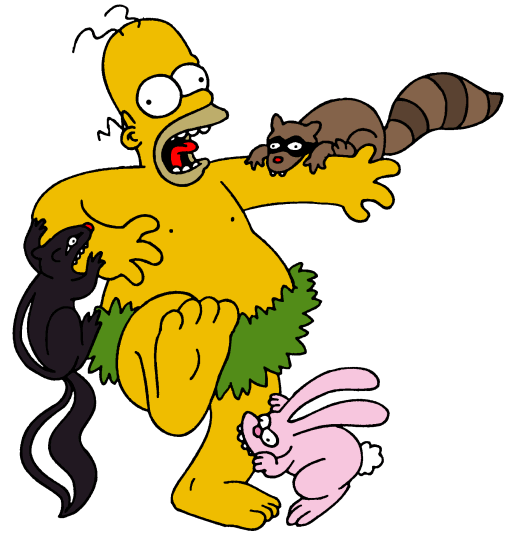

In [136]:
imagem = cv2.imread('/content/homer_bart_2/test_set/homer/homer15.bmp')
cv2_imshow(imagem)

In [137]:
imagem.shape

(536, 514, 3)

In [138]:
imagem = cv2.resize(imagem, (64,64))

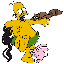

In [139]:
cv2_imshow(imagem)

In [140]:
imagem = imagem / 255

In [141]:
imagem = imagem.reshape(-1, # Adiciona mais uma dimensão indicando o batch size, neste caso apenas uma imagem
                 64, 64, 3)

In [142]:
previsao = rede.predict(imagem)
previsao

array([[0.24624828, 0.7537517 ]], dtype=float32)

In [143]:
previsao = np.argmax(previsao)
previsao

1

In [144]:
dataset_teste.class_indices

{'bart': 0, 'homer': 1}